In [3]:
import torch
from d2l import torch as d2l

### Maximum Likelihood Estimation

\begin{align}
\hat{\boldsymbol{\theta}} = \mathop{\mathrm{argmax}} _ {\boldsymbol{\theta}} P(X \mid \boldsymbol{\theta})
\end{align}

#### Coin Flip example

\begin{align}
P(X = \{ HHHTHTTHHHHHT \}\mid \theta) = \theta^9(1-\theta)^4.
\end{align}

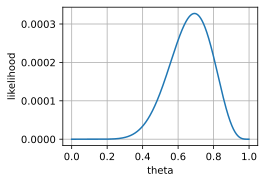

In [4]:
%matplotlib inline
theta = torch.arange(0, 1, 0.001)
p = theta**9 * (1 - theta)**4

d2l.plot(theta, p, "theta", "likelihood")


Our goal is to minimize the negative log-likelihood

\begin{align}
-\log(P(X \mid \boldsymbol{\theta})) = -\log(\theta^{n_H}(1-\theta)^{n_T}) = -(n_H\log(\theta) + n_T\log(1-\theta)).
\end{align}

In [11]:
# Set up our data
n_H = 8675309
n_T = 256245

# Initialize our parameters
theta = torch.tensor(0.5, requires_grad=True)

# Perform gradient descent
lr = 1e-9
for iter in range(100):
    loss = -(n_H * torch.log(theta) + n_T * torch.log(1 - theta))
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
    theta.grad.zero_()

# Check output
theta, n_H / (n_H + n_T)

(tensor(0.9713, requires_grad=True), 0.9713101437890875)

### Exercises

1. Suppose that you know that a non-negative random variable has density $\alpha e^{-\alpha x}$ for some value $\alpha > 0$. 
You obtain a single observation from the random variable which is the number $3$. What is the maximum likelihood estimate for $\alpha$?

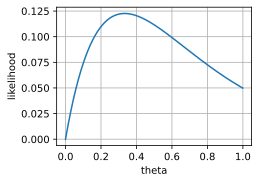

In [30]:
%matplotlib inline

alpha = torch.arange(0, 1, 0.001)
p = alpha*torch.exp(-3*alpha)

d2l.plot(alpha, p, "theta", "likelihood")
    

In [26]:
# Set up our data
x = 3

# Initialize our parameters
alpha = torch.tensor(0.5, requires_grad=True)

# Perform gradient descent
lr = 1e-3

for iter in range(1000):
    loss = -torch.log(alpha) + 3*alpha
    loss.backward()
    with torch.no_grad():
        alpha -= lr * alpha.grad
    alpha.grad.zero_()

# Check output
alpha

tensor(0.3334, requires_grad=True)

Suppose that you have a dataset of samples $\{x_i\}_{i=1}^N$ drawn from a Gaussian with unknown mean, but variance $1$. 
What is the maximum likelihood estimate for the mean?

In [90]:
# Set up our data
N = 10000
true_mu = 0.2
X = torch.empty(N).normal_(mean=true_mu, std=1)

# Initialize our parameters
hat_mu = torch.tensor(0.5, requires_grad=True)

# Perform gradient descent
lr = 1e-3

for iter in range(10000):
    loss = 0.5*(X - hat_mu)**2
    loss = loss.mean()
    loss.backward()
    with torch.no_grad():
        hat_mu -= lr * hat_mu.grad
    hat_mu.grad.zero_()

hat_mu, X.mean()

# Check output


(tensor(0.2079, requires_grad=True), tensor(0.2079))